<a href="https://colab.research.google.com/github/yudumpacin/UrbanSoundsClassification/blob/main/UrbanSounds_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2 as cv

In [23]:
from google.colab.patches import cv2_imshow

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/spectrograms

/content/drive/.shortcut-targets-by-id/1xey3vAVNDjWxnSfhuUsf_5dGANZWmCog/spectrograms


In [9]:
path_to_image = os.getcwd()+"/0/13230-0-0-1.png"

In [16]:
img = cv.imread(path_to_image)

In [26]:
img.shape

(374, 500, 3)

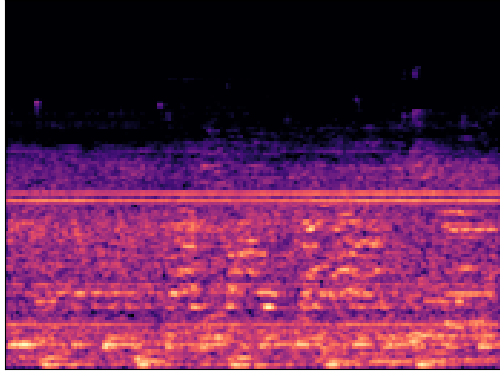

In [25]:
cv2_imshow(img)

In [17]:
img.shape

(374, 500, 3)

In [27]:
a = cv.resize(img,(256,256))


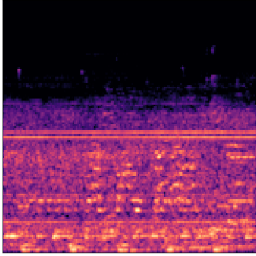

In [28]:
cv2_imshow(a)

In [30]:
target_class = {
0 : "air_conditioner",
1 : "car_horn",
2 : "children_playing",
3 : "dog_bark",
4 : "drilling",
5 : "engine_idling",
6 : "gun_shot",
7 : "jackhammer",
8 : "siren",
9 : "street_music"
}

In [37]:
categories = list(target_class.keys())

In [42]:
path_to_dataset = os.getcwd()

In [52]:
images = []
for category in categories:
    max_image_number = 0
    idx = categories.index(category)
    for image in os.listdir(f"{path_to_dataset}/{category}"):
        if max_image_number == 1000:
            break
        path_to_image = f"{path_to_dataset}/{category}/{image}"
        try:
            img = cv.imread(path_to_image,cv.COLOR_BGR2GRAY)
            img = cv.resize(img,(128,128))
            img = img/255   
            images.append([idx,img])
            max_image_number += 1
        except Exception as e:
            print(e)
            pass

In [53]:
X = []
y = []
y = [x[0] for x in images]
X = [x[1] for x in images]

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True)
X_val,X_test,y_val,y_test = train_test_split(X_test,y_test,test_size=0.5,random_state=0,shuffle=True)

In [48]:
len(X_train)

6985

In [49]:
len(X_val)

873

In [50]:
len(X_test)

874

In [55]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

In [64]:
%cd /content/drive/MyDrive/UrbanSounds

/content/drive/MyDrive/UrbanSounds


In [65]:
import pickle

In [66]:
with open('X_train.pickle', 'wb') as output:
    pickle.dump(X_train,output)

with open('y_train.pickle', 'wb') as output:
    pickle.dump(y_train,output)

with open('X_val.pickle', 'wb') as output:
    pickle.dump(X_val,output)

with open('y_val.pickle', 'wb') as output:
    pickle.dump(y_val,output)

with open('X_test.pickle', 'wb') as output:
    pickle.dump(X_test,output)

with open('y_test.pickle', 'wb') as output:
    pickle.dump(y_test,output)
